In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("311 Data Exploration.csv")
dataset[:3]

,caseID,opened,closed,difference_mins,responsible_agency,category,sup_district,neighborhood,source,pop_den,pop,households,median_hInc,percent_pov,eduHS,vehicles,num_business,num_facilities
0,11884029,1/1/2020 0:07,1/1/2020 9:44,577,Recology_Abandoned,Street and Sidewalk Cleaning,8,Castro,Integrated Agency,36.9,"68,200","34,190","$121,250",7%,9%,"36,910",19485,64
1,11884069,1/1/2020 0:42,1/1/2020 1:02,20,Parking Enforcement Dispatch Queue,Parking Enforcement,5,Panhandle,Phone,56.0,"84,030","40,460","$91,055",13%,14%,"33,550",20027,135
2,11884079,1/1/2020 0:51,1/1/2020 7:55,424,Parking Enforcement Dispatch Queue,Parking Enforcement,1,Inner Richmond,Phone,24.5,"79,970","32,240","$83,215",11%,22%,"38,790",13684,162


In [ ]:
# split out opened time from opened date - may have useful information
dataset[['opened_date','opened_time']] = dataset.opened.str.split(" ", expand=True)

# remove "opened", "difference", "difference_mins"
dataset = dataset.drop(columns= ["opened"])
dataset['opened_date'] = dataset['opened_date'].map(pd.Timestamp)

# get month to examine seasonality
dataset["month"] = dataset['opened_date'].map(lambda dm: dm.month)
dataset

,caseID,closed,difference_mins,responsible_agency,category,sup_district,neighborhood,source,pop_den,pop,households,median_hInc,percent_pov,eduHS,vehicles,num_business,num_facilities,opened_date,opened_time,month
0,11884029,1/1/2020 9:44,577,Recology_Abandoned,Street and Sidewalk Cleaning,8,Castro,Integrated Agency,36.9,"68,200","34,190","$121,250",7%,9%,"36,910",19485,64,2020-01-01,0:07,1
1,11884069,1/1/2020 1:02,20,Parking Enforcement Dispatch Queue,Parking Enforcement,5,Panhandle,Phone,56.0,"84,030","40,460","$91,055",13%,14%,"33,550",20027,135,2020-01-01,0:42,1
2,11884079,1/1/2020 7:55,424,Parking Enforcement Dispatch Queue,Parking Enforcement,1,Inner Richmond,Phone,24.5,"79,970","32,240","$83,215",11%,22%,"38,790",13684,162,2020-01-01,0:51,1
3,11884088,1/8/2020 8:26,10530,DPW Ops Queue,Street and Sidewalk Cleaning,4,Outer Sunset,Phone,31.0,"77,000","26,680","$88,801",10%,28%,"41,520",10562,60,2020-01-01,0:56,1
4,11884100,1/1/2020 6:46,346,Parking Enforcement Dispatch Queue,Parking Enforcement,10,Silver Terrace,Phone,15.2,"75,250","23,910","$69,915",16%,42%,"34,520",20132,300,2020-01-01,1:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452160,13315585,1/1/2021 7:13,507,Parking Enforcement Dispatch Queue,Parking Enforcement,10,Potrero Hill,Mobile/Open311,15.2,"75,250","23,910","$69,915",16%,42%,"34,520",20132,300,2020-12-31,22:46,12
452161,13315601,1/2/2021 8:40,2016,Recology_Overflowing,Street and Sidewalk Cleaning,6,Rincon Hill,Mobile/Open311,30.5,"69,360","37,280","$54,819",23%,29%,"18,410",40514,201,2020-12-31,23:04,12
452162,13315603,1/25/2021 1:30,34703,RPD TMA Queue,Rec and Park Requests,10,Bayview,Mobile/Open311,15.2,"75,250","23,910","$69,915",16%,42%,"34,520",20132,300,2020-12-31,23:07,12
452163,13315618,1/1/2021 8:57,575,Recology_Abandoned,Street and Sidewalk Cleaning,9,Mission,Mobile/Open311,38.6,"86,430","30,580","$83,839",12%,35%,"35,380",18107,89,2020-12-31,23:22,12


In [ ]:
# create an AM/PM column - might be helpful
PM = []
for i in range(12,24):
    t = str(i)
    PM.append(t)
for t in PM:
    dataset["AM/PM"] = dataset["opened_time"].map(lambda x: "PM" if x[:2] in PM else "AM")
dataset

,caseID,closed,difference_mins,responsible_agency,category,sup_district,neighborhood,source,pop_den,pop,...,median_hInc,percent_pov,eduHS,vehicles,num_business,num_facilities,opened_date,opened_time,month,AM/PM
0,11884029,1/1/2020 9:44,577,Recology_Abandoned,Street and Sidewalk Cleaning,8,Castro,Integrated Agency,36.9,"68,200",...,"$121,250",7%,9%,"36,910",19485,64,2020-01-01,0:07,1,AM
1,11884069,1/1/2020 1:02,20,Parking Enforcement Dispatch Queue,Parking Enforcement,5,Panhandle,Phone,56.0,"84,030",...,"$91,055",13%,14%,"33,550",20027,135,2020-01-01,0:42,1,AM
2,11884079,1/1/2020 7:55,424,Parking Enforcement Dispatch Queue,Parking Enforcement,1,Inner Richmond,Phone,24.5,"79,970",...,"$83,215",11%,22%,"38,790",13684,162,2020-01-01,0:51,1,AM
3,11884088,1/8/2020 8:26,10530,DPW Ops Queue,Street and Sidewalk Cleaning,4,Outer Sunset,Phone,31.0,"77,000",...,"$88,801",10%,28%,"41,520",10562,60,2020-01-01,0:56,1,AM
4,11884100,1/1/2020 6:46,346,Parking Enforcement Dispatch Queue,Parking Enforcement,10,Silver Terrace,Phone,15.2,"75,250",...,"$69,915",16%,42%,"34,520",20132,300,2020-01-01,1:00,1,AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452160,13315585,1/1/2021 7:13,507,Parking Enforcement Dispatch Queue,Parking Enforcement,10,Potrero Hill,Mobile/Open311,15.2,"75,250",...,"$69,915",16%,42%,"34,520",20132,300,2020-12-31,22:46,12,PM
452161,13315601,1/2/2021 8:40,2016,Recology_Overflowing,Street and Sidewalk Cleaning,6,Rincon Hill,Mobile/Open311,30.5,"69,360",...,"$54,819",23%,29%,"18,410",40514,201,2020-12-31,23:04,12,PM
452162,13315603,1/25/2021 1:30,34703,RPD TMA Queue,Rec and Park Requests,10,Bayview,Mobile/Open311,15.2,"75,250",...,"$69,915",16%,42%,"34,520",20132,300,2020-12-31,23:07,12,PM
452163,13315618,1/1/2021 8:57,575,Recology_Abandoned,Street and Sidewalk Cleaning,9,Mission,Mobile/Open311,38.6,"86,430",...,"$83,839",12%,35%,"35,380",18107,89,2020-12-31,23:22,12,PM


In [ ]:
dataset.to_csv('311 Dataset.csv')

<AxesSubplot:>

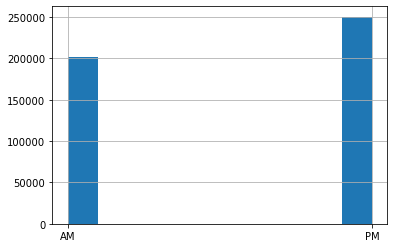

In [ ]:
dataset['AM/PM'].hist()

<AxesSubplot:>

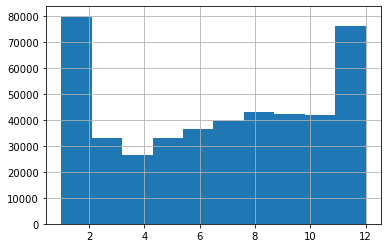

In [ ]:
dataset["month"].hist()

In [ ]:
for i in range(1,13):
    count = len(dataset[dataset["month"] == i])
    print(i, count)

1 41384
2 38440
3 32958
4 26620
5 32975
6 36585
7 39708
8 42962
9 42382
10 41930
11 37608
12 38613


Text(0.0, 1.0, 'Most Cases Resolved Within 10,000 mins\nNumber of Cases Resolved per 10,000 mins')

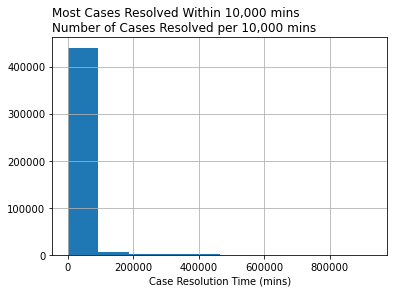

In [ ]:
dataset["difference_mins"].hist()
plt.xlabel("Case Resolution Time (mins)")
plt.title("Most Cases Resolved Within 10,000 mins\nNumber of Cases Resolved per 10,000 mins", loc="left")

In [ ]:
# Check for correlation between each quantitative variable

corr = dataset.corr()
corr

,caseID,difference_mins,sup_district,pop_den,num_business,num_facilities,month
caseID,1.000000,-0.048579,-0.004405,0.008857,-0.007884,-0.004627,0.996151
difference_mins,-0.048579,1.000000,-0.010889,-0.010733,-0.003177,-0.001289,-0.049310
sup_district,-0.004405,-0.010889,1.000000,-0.143678,-0.271073,0.044193,-0.003698
pop_den,0.008857,-0.010733,-0.143678,1.000000,0.345741,-0.337950,0.009168
num_business,-0.007884,-0.003177,-0.271073,0.345741,1.000000,0.373447,-0.008150
num_facilities,-0.004627,-0.001289,0.044193,-0.337950,0.373447,1.000000,-0.004935
month,0.996151,-0.049310,-0.003698,0.009168,-0.008150,-0.004935,1.000000


In [ ]:
dataset["difference_mins"].describe()

count    452165.000000
mean       9927.383953
std       45342.720754
min           0.000000
25%         113.000000
50%         686.000000
75%        2641.000000
max      928247.000000
Name: difference_mins, dtype: float64

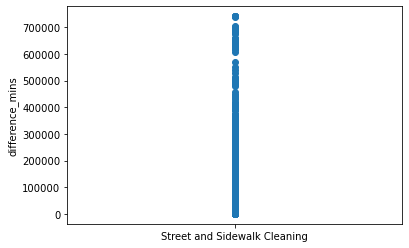

252114


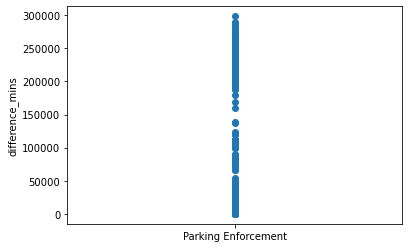

53743


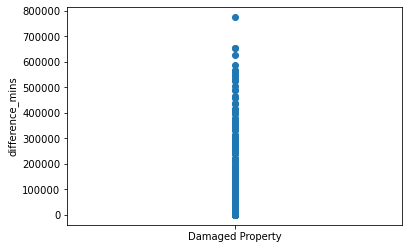

5459


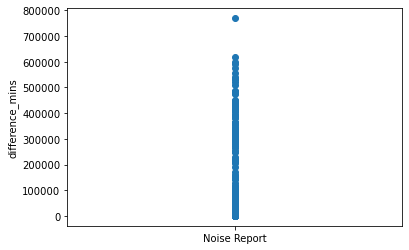

1818


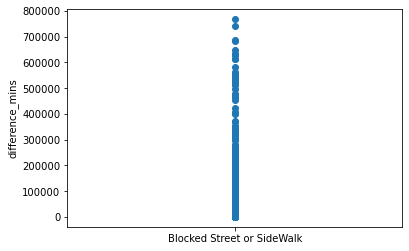

2741


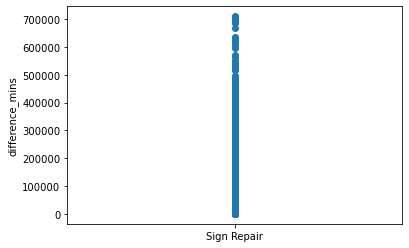

7478


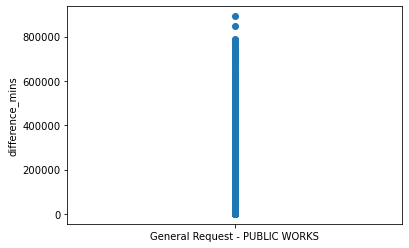

16262


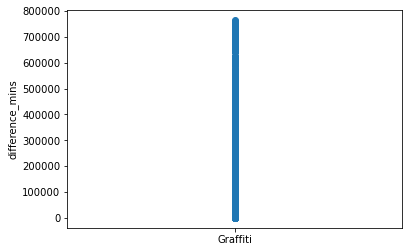

42973


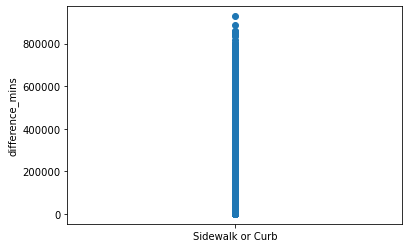

3902


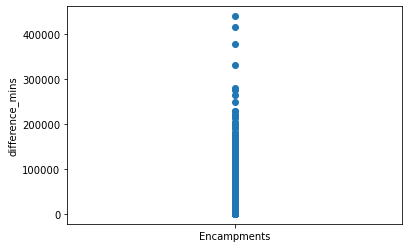

6456


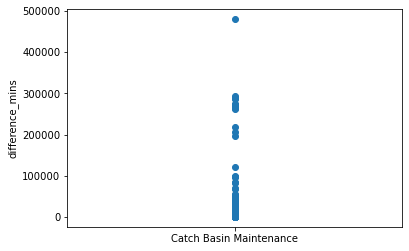

281


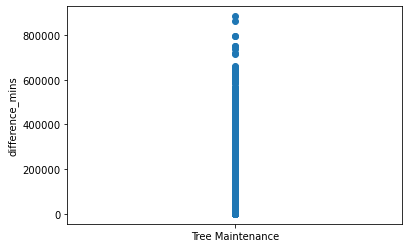

4899


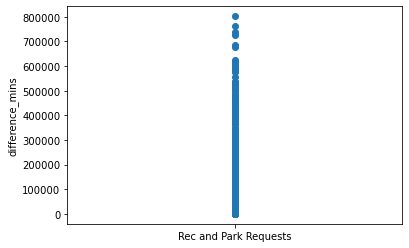

6644


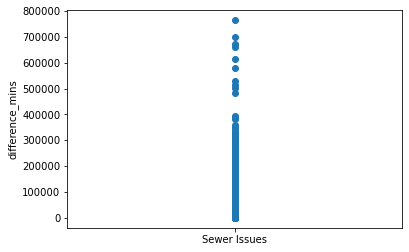

6597


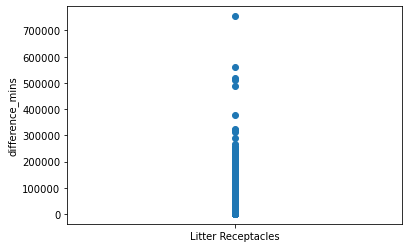

7192


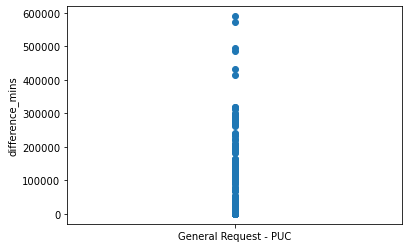

748


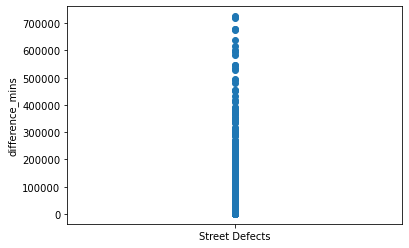

2320


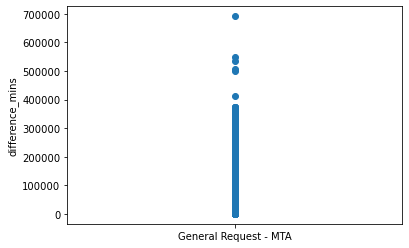

2150


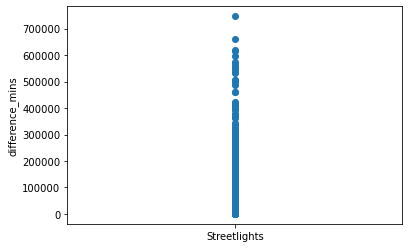

2369


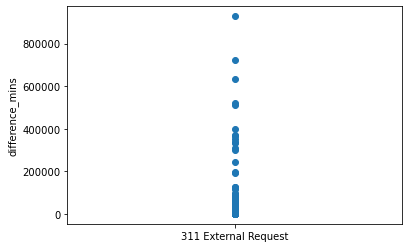

195


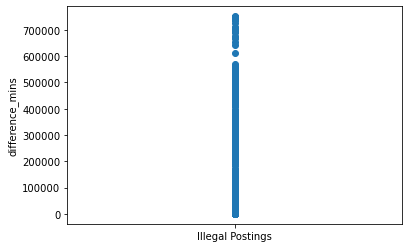

13750


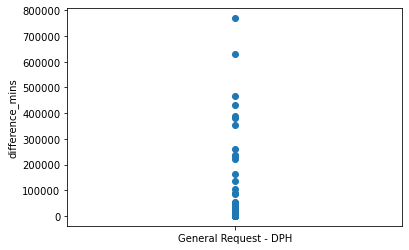

206


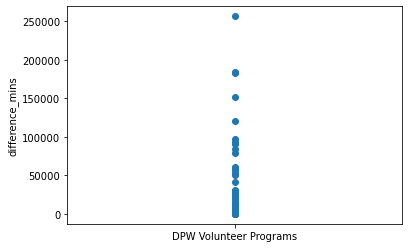

43


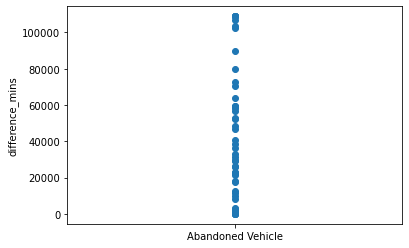

50


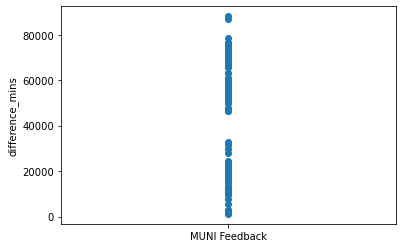

153


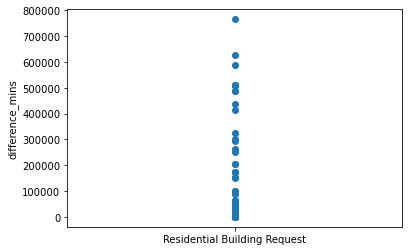

193


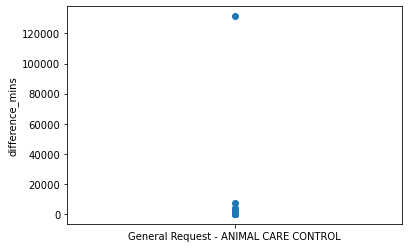

76


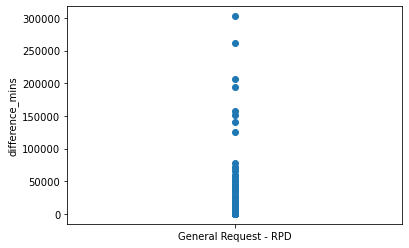

91


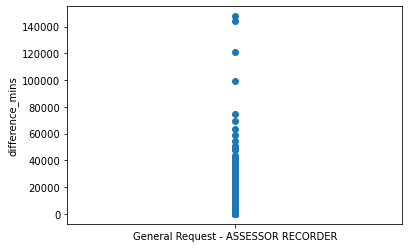

1621


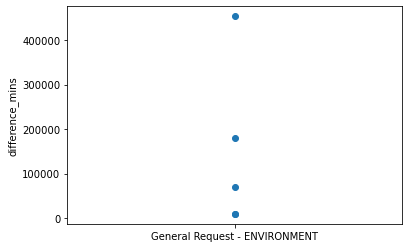

5


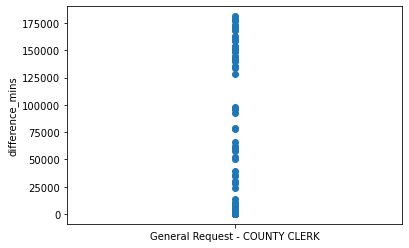

98


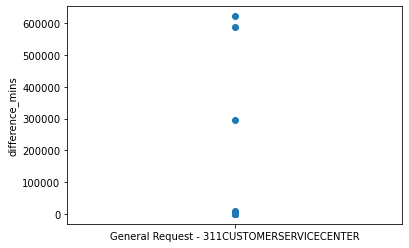

17


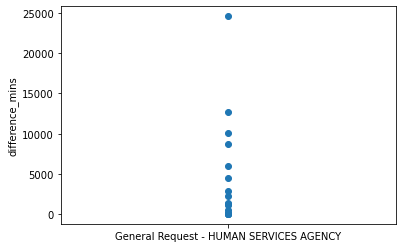

18


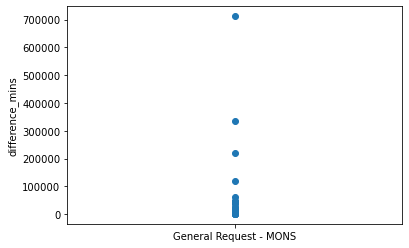

43


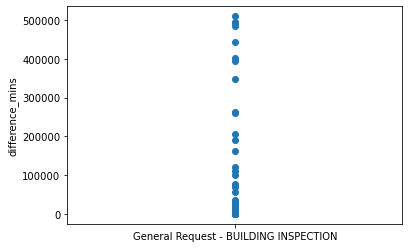

198


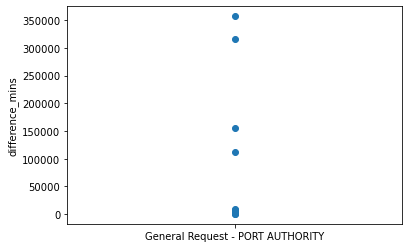

11


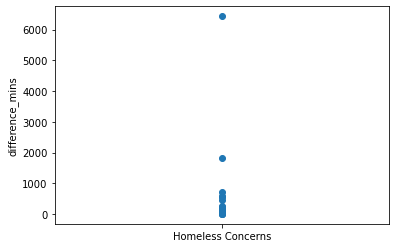

24


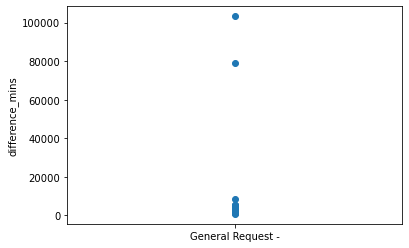

15


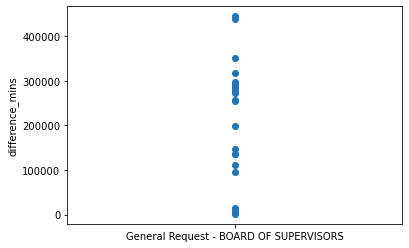

24


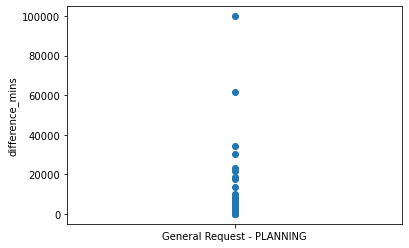

31


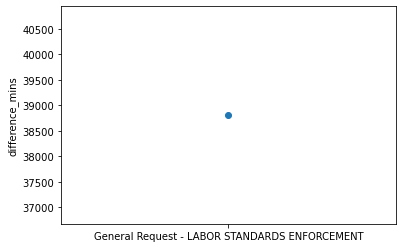

1


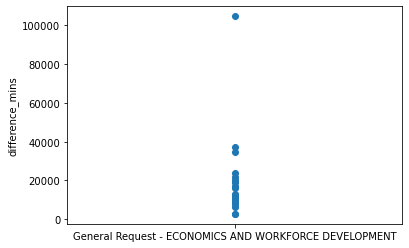

24


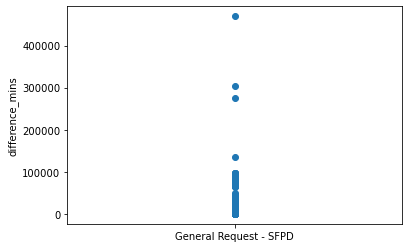

2163


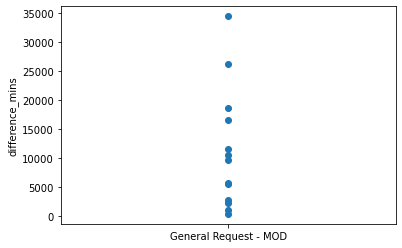

13


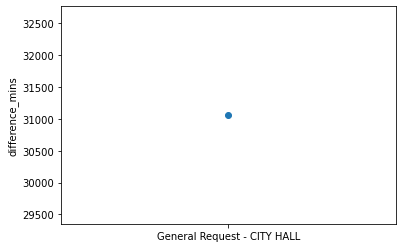

1


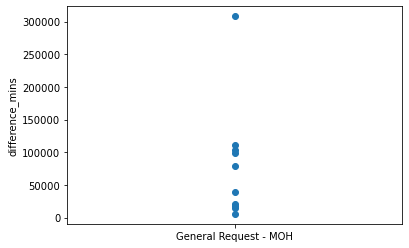

10


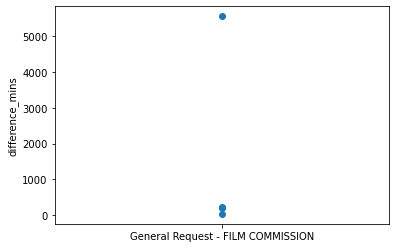

4


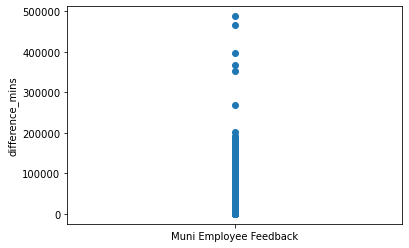

3992


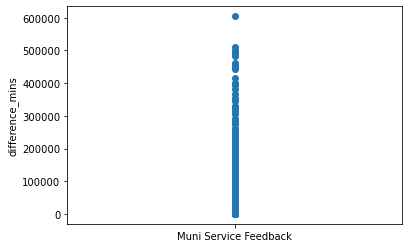

2767


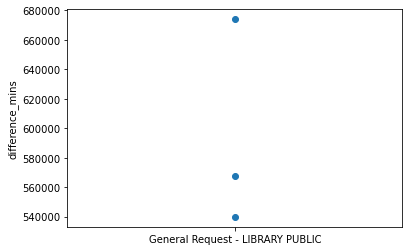

3


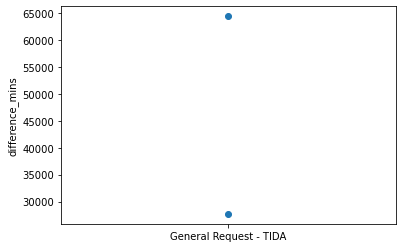

2


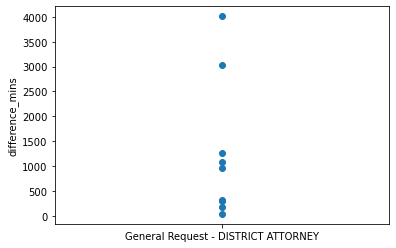

9


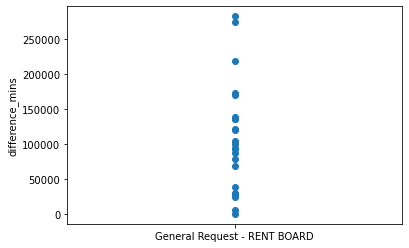

24


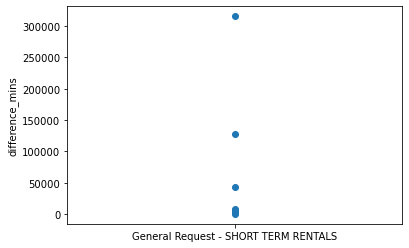

7


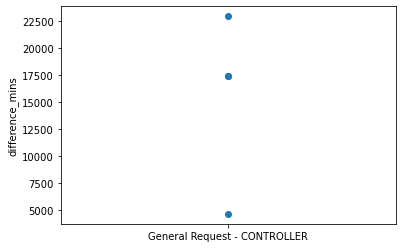

4


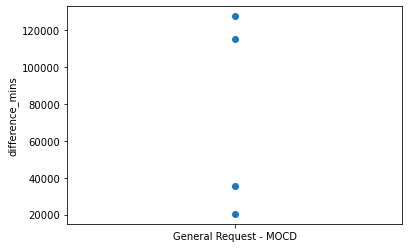

4


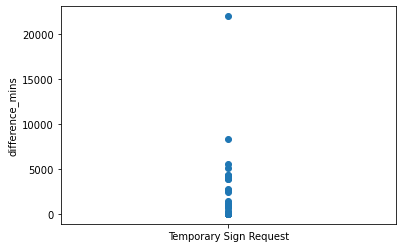

77


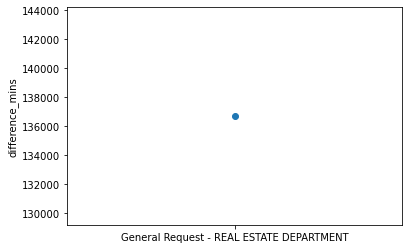

1


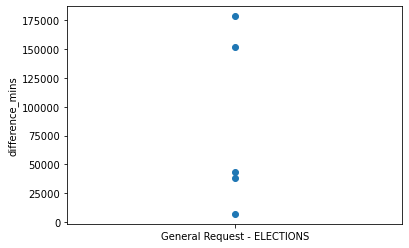

5


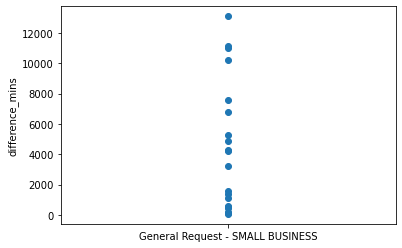

20


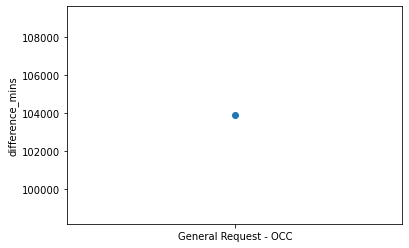

1


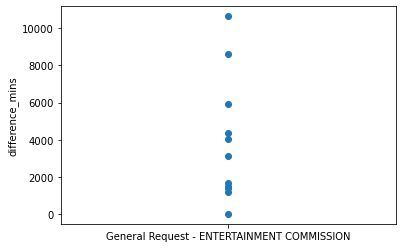

12


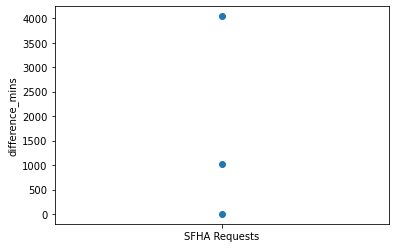

3


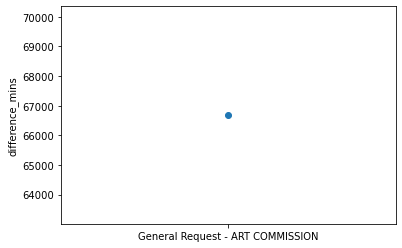

1


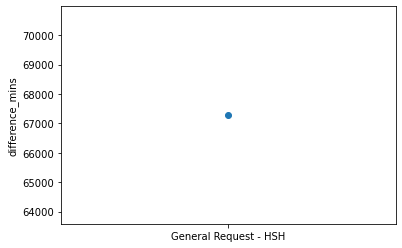

1


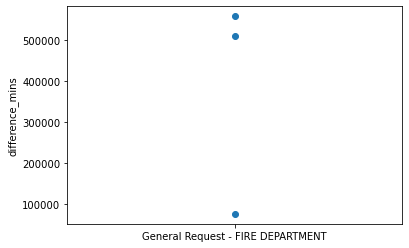

3


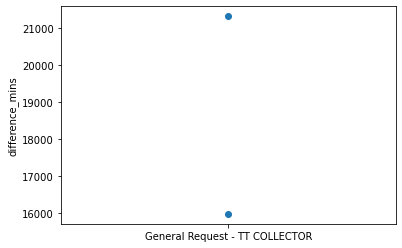

2


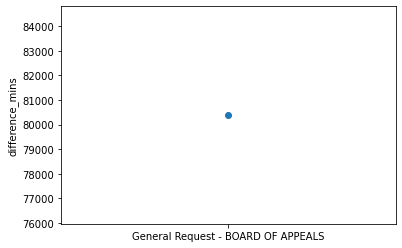

1


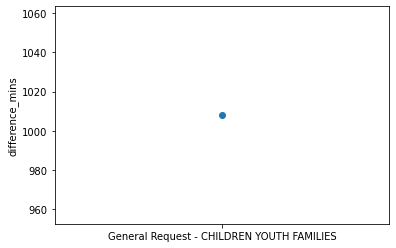

1


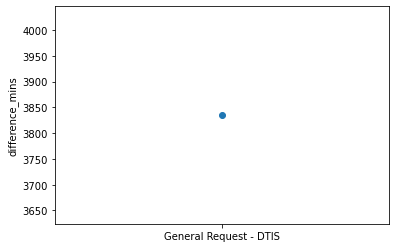

1


In [ ]:
# See distribution for resolution time for each category

# In hindsight, should have used a box plot instead of scatter. 
# However, it is still clear that the range for resolution time per category is very wide

categories = list(dataset["category"].unique())
for i in range(len(categories)):
    cat = categories[i]
    data = dataset[dataset["category"] == cat]
    plt.scatter(data["category"], data["difference_mins"])
    plt.ylabel("difference_mins")
    plt.show()
    print(len(data))

In [ ]:
# Extract unique categories in the dataset
categories = list(dataset["category"].unique())

In [ ]:
# Get number of calls per category

for i in range(len(categories)):
    cat = categories[i]
    count = len(dataset[dataset["category"] == cat])
    print(cat, count)

Street and Sidewalk Cleaning 252114
Parking Enforcement 53743
Damaged Property 5459
Noise Report 1818
Blocked Street or SideWalk 2741
Sign Repair 7478
General Request - PUBLIC WORKS 16262
Graffiti 42973
Sidewalk or Curb 3902
Encampments 6456
Catch Basin Maintenance 281
Tree Maintenance 4899
Rec and Park Requests 6644
Sewer Issues 6597
Litter Receptacles 7192
General Request - PUC 748
Street Defects 2320
General Request - MTA 2150
Streetlights 2369
311 External Request 195
Illegal Postings 13750
General Request - DPH 206
DPW Volunteer Programs 43
Abandoned Vehicle 50
MUNI Feedback 153
Residential Building Request 193
General Request - ANIMAL CARE CONTROL 76
General Request - RPD 91
General Request - ASSESSOR RECORDER 1621
General Request - ENVIRONMENT 5
General Request - COUNTY CLERK 98
General Request - 311CUSTOMERSERVICECENTER 17
General Request - HUMAN SERVICES AGENCY 18
General Request - MONS 43
General Request - BUILDING INSPECTION 198
General Request - PORT AUTHORITY 11
Homeless C

In [ ]:
# Get number of calls from each supervisor district

supervisor_dist = sorted(list(dataset["sup_district"].unique()))
for i in range(len(supervisor_dist)):
    sup = supervisor_dist[i]
    count = len(dataset[dataset["sup_district"] == sup])
    print(sup, count)

1 42820
2 28915
3 45039
4 22244
5 60731
6 51066
7 17038
8 47084
9 61478
10 47742
11 28008


In [ ]:
# Get mean resolution time, % of residents with education below high school, poverty level, and median household income 
# Per supervisor district

for i in range(len(supervisor_dist)):
    sup = supervisor_dist[i]
    data = dataset[dataset["sup_district"] == sup]
    eduHS = data["eduHS"].unique()
    pov_lvl = data["percent_pov"].unique()
    income = data["median_hInc"].unique()
    mean_time_diff = data["difference_mins"].mean()
    print("Mean Time Difference")
    print(sup, mean_time_diff, "\n")
    print("Education below HS")
    print(sup, eduHS, "\n")
    print("Poverty level")
    print(sup, pov_lvl, "\n")
    print("Median Household Income")
    print(sup, income, "\n")
    

Mean Time Difference
1 10192.27669313405 

Education below HS
1 ['22%'] 

Poverty level
1 ['11%'] 

Median Household Income
1 ['$83,215 '] 

Mean Time Difference
2 9516.162649144042 

Education below HS
2 ['7%'] 

Poverty level
2 ['6%'] 

Median Household Income
2 ['$128,633 '] 

Mean Time Difference
3 9185.275894225006 

Education below HS
3 ['30%'] 

Poverty level
3 ['17%'] 

Median Household Income
3 ['$59,111 '] 

Mean Time Difference
4 13769.882709944255 

Education below HS
4 ['28%'] 

Poverty level
4 ['10%'] 

Median Household Income
4 ['$88,801 '] 

Mean Time Difference
5 9821.505442031252 

Education below HS
5 ['14%'] 

Poverty level
5 ['13%'] 

Median Household Income
5 ['$91,055 '] 

Mean Time Difference
6 10387.12634629695 

Education below HS
6 ['29%'] 

Poverty level
6 ['23%'] 

Median Household Income
6 ['$54,819 '] 

Mean Time Difference
7 14019.757483272684 

Education below HS
7 ['15%'] 

Poverty level
7 ['10%'] 

Median Household Income
7 ['$115,552 '] 

Mean Time D